In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Lectures 1+2

**Linear neurons**

$y=b+\sum_ix_iw_i$

In [3]:
def linear_neuron(x,w,b = 0):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    y = b + np.dot(w.T,x)
    return y

x = np.random.rand(100,)
w = np.random.rand(100,)
y = linear_neuron(x,w)

print(y, y.shape)

shape(x) is (100,) and shape(w) is (100,)
25.3055298596 ()


In [4]:
def binary_threshold_neuron(x,w,b = 0, theta = None):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    if theta == None: theta = -b
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    z = b + np.dot(w.T,x)
    print("z is %.3f" % z)
    y = 1 if (z >= theta) else 0
    return y

x = np.random.rand(100,)
w = np.random.rand(100,)
y = binary_threshold_neuron(x,w, b=1, theta = 60)

print("y is %.3f" % y)

shape(x) is (100,) and shape(w) is (100,)
z is 25.651
y is 0.000


In [39]:
def sigmoid_neuron(x,w,b = 0.):
    """
    x = (m*1)
    w = (m*1)
    b = scalar
    """
    assert (len(x.shape) ==1) & (len(w.shape) == 1) & (x.shape[0] == w.shape[0])
    print("shape(x) is %s and shape(w) is %s" %(str(x.shape),str(w.shape)))
    z = b + np.dot(w.T,x)
    print("z is %.3f" % z)
    y = 1. / (1. + np.exp(-z))
    return y

x = np.random.rand(100,)
w = np.random.rand(100,) * np.full(100,.001) #make weights small scale
y = sigmoid_neuron(x,w)

print("y is %.25f" % y)

shape(x) is (100,) and shape(w) is (100,)
z is 0.026
y is 0.5063841208407469096641762


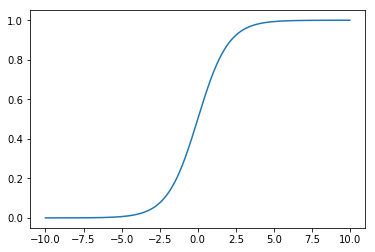

In [46]:
def plot_sigmoid():
    z = np.arange(-10,10,.02)
    y = 1. / (1. + np.exp(-z))
    plt.plot(z,y)
    plt.show()
plot_sigmoid()

**Angle between vectors**

$A.B = |A|.|B|.cos(\theta)$

In [63]:
(def get_angle_dot_vectors(v1,v2):
    """
    Returns the angle (in degrees) and dot product of 2 vectors
    """
    dot_product = np.dot(v1,v2)
    cos_theta = dot_product/(np.linalg.norm(v1)*np.linalg.norm(v2))
    return np.degrees(np.arccos(cos_theta)), dot_product
v1 = np.array([1,2])
v2 = np.array([-1,3])
print(get_angle_dot_vectors(v1,v2))
v2 = np.array([-1,0.5]) #perpendicular
print(get_angle_dot_vectors(v1,v2))
v2 = np.array([-1,0.2]) #theta > 90
print(get_angle_dot_vectors(v1,v2))

#Multidimentional
v1 = np.random.rand(5)
v2 = np.random.rand(5)
print("Multidimentional vectors", v1, v2))
print(get_angle_dot_vectors(v1,v2))

(45.000000000000007, 5)
(90.0, 0.0)
(105.25511870305778, -0.59999999999999998)
Multidimentional vectors [ 0.4933704   0.42779018  0.33321147  0.6816322   0.95980062] [ 0.90039248  0.34193319  0.62649577  0.90058925  0.27429217]
(35.532526599242992, 1.6763946625219732)


### Lecture 3

**Delta rule**

$\Delta w_i = -\varepsilon x_i(t-y)$

** Derivation **

Assume we have $N$ training samples and $W$ weight parameters.

Our training samples are a matrix $x$ with element $x_{n,i}$ representing the $i$-th input value (column) for the $n$-th sample (row). $t$ represents a $N$-long vector containing the truth outcomes, while $y$ is a similarly $N$-long vector with the predicted outcomes.

Our total model error $E = \frac {1}{2} \sum_{n \in N} (t_n - y_n)^2$ and individual sample error $E_n = \frac {1}{2}(t_n - y_n)^2$.

We want to get the error $E$ to approach zero, thus we differentiate the error formula w.r.t. all weight parameters $W$. Since the same weight vector $W$ applies to all training cases, and each training case will yield a different partial differential for $W$, we can't in one go zero the error of all training cases.

Instead we differentiate $E$, the sum of all errors on each weight parameter and substract the partial derivatives from the weight in the hope of minimizing the total error. If we do this for enough iteratios, we are guaranteed to reach a solution if a feasible solution exists. Convergence proof at http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf

Partial derivatives: For $i \in W , 
\frac{\partial E}{\partial w_i} = \frac{1}{2} \sum{n \in N} \frac{\partial y_n}{\partial w_i} 
\frac{dE_n}{dy_n}$ using chain rule

Since $\frac{\partial y_n}{\partial w_i} = x_{n,i}$, by definition of $y_n$, and $\frac{dE_n}{dy_n} = (t_n - y_n)$ by applying the product rule to the definition of individual sample error.

Thus $\frac{\partial E}{\partial w_i} = x_{n,i}.(t_n - y_n)$

To get $\Delta w_i$, we use multiply the partial derivative $\frac{\partial E}{\partial w_i}$ by both $-1$ and $\varepsilon$. The $-1$ ensures that the new error value is less than the current one, while $\varepsilon$, a positive real number, is called the *training rate*.

**How** does multiplying by $-1$ ensure error $E$ is decreasing?

From definition of differentiation and for any $w$ weight vector and $x$ input vector, $\frac{\partial E}{\partial w} \approx \frac{\Delta E}{\Delta w}$ for an infinitesimally small $\Delta w = w - w_o$. Thus $\frac{E-E_o}{w-w_o} \approx (t-y).x$

Assume $\Delta w = -\varepsilon.(t-y).x$, then $E-E_o = (\varepsilon.(t-y).x).((t-y).x) = -\varepsilon.(t-y)^2.x^2$, which is always negative. Thus, assuming a small value for $\varepsilon$, adding the negative valued $\Delta w$ to the current weights $w_o$, we will get the desired effect of lowering $E$.

**Why** we use the learning rate $\varepsilon$, and how to set it? 